In [1]:
import tensorflow as tf       #build model
import pandas as pd           #data manipulation and preprocessing
import numpy as np            #maths computations
import tensorflow_datasets as tfds   #dataset
import matplotlib.pyplot as plt

2024-04-13 17:02:11.163075: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset ,dataset_info = tfds.load('malaria',with_info=True,shuffle_files=True,as_supervised=True,split=['train'])

2024-04-13 17:02:32.962409: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [4]:
for data in dataset[0].take(2):
  print(data)

(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(133, 127, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

2024-04-13 17:10:53.788789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/home/studio-lab-user/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thi

In [6]:
#define function for splitting
def splits(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  DATASET_SIZE = len(dataset)

  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_dataset1 = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset = val_dataset1.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset =  val_dataset1.skip(int(VAL_RATIO*DATASET_SIZE))

  return train_dataset, val_dataset,test_dataset

In [7]:
#calling function
TRAIN_RATIO = 0.8
VAL_RATIO =0.1
TEST_RATIO =0.1

train_dataset,val_dataset,test_dataset = splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)

print(list(train_dataset.take(1).as_numpy_iterator()),
      list(val_dataset.take(1).as_numpy_iterator()),
      list(test_dataset.take(1).as_numpy_iterator()))

2024-04-13 17:12:18.240801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-13 17:12:23.070383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

2024-04-13 17:12:28.478952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-04-13 17:12:49.805122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


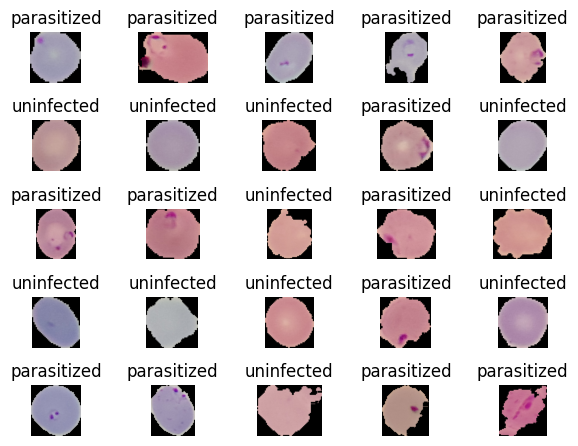

In [8]:
for i,(image,label) in enumerate(train_dataset.take(25)):
  ax = plt.subplot(5,5,i+1)

  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.tight_layout()
  plt.axis('off')

In [9]:
IM_SIZE = 224
def resize_rescale(image,label):
  return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255.0 ,label

In [10]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [11]:
for image,label in train_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


2024-04-13 17:13:26.753812: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset   = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization ,Input

func_input = Input(shape=(IM_SIZE,IM_SIZE,3),name = "Input Image")

x=Conv2D(filters = 6,kernel_size = 3,strides=(1, 1),padding='valid',activation='relu')(func_input)
x=BatchNormalization()(x)
x=MaxPool2D(pool_size=(2, 2),strides=2)(x)

x=Conv2D(filters = 16,kernel_size =3,strides=(1, 1),padding='valid',activation='relu')(x)
x=BatchNormalization()(x)
x=MaxPool2D(pool_size=(2, 2),strides=2)(x)

x=Flatten()(x)

x=Dense(100,activation ="relu")(x)
x=BatchNormalization()(x)

x=Dense(10 ,activation ="relu")(x)
x=BatchNormalization()(x)

func_output = Dense(1  ,activation ="sigmoid")(x)

lenet_model_func = Model(func_input,func_output,name = "lenet_model")

lenet_model_func.summary()

Model: "lenet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input Image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

In [14]:
tf.keras.utils.plot_model(lenet_model_func,to_file="model.png",show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

lenet_model_func.compile (
                 optimizer = Adam(learning_rate = 0.01),
                 loss = BinaryCrossentropy(),
                 metrics = ['accuracy']
)

In [17]:
#training the model
history = lenet_model_func.fit(train_dataset,validation_data = val_dataset,epochs=10, verbose =1)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 212s 303ms/step - accuracy: 0.7645 - loss: 0.4738 - val_accuracy: 0.9064 - val_loss: 0.2385
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 209s 303ms/step - accuracy: 0.9296 - loss: 0.1969 - val_accuracy: 0.7840 - val_loss: 0.3777
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 209s 303ms/step - accuracy: 0.9387 - loss: 0.1830 - val_accuracy: 0.5064 - val_loss: 1.0082
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 208s 303ms/step - accuracy: 0.9444 - loss: 0.1664 - val_accuracy: 0.7299 - val_loss: 0.5047
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 208s 302ms/step - accuracy: 0.9460 - loss: 0.1539 - val_accuracy: 0.6947 - val_loss: 0.4332
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 209s 303ms/step - accuracy: 0.9517 - loss: 0.1451 - val_accuracy: 0.9499 - val_loss: 0.1683
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 209s 303ms/step - accuracy: 0.9565 - loss: 0.1379 - val_accuracy: 0.9445 - val_loss: 0.2139
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 209s 303ms/step - accuracy: 0.9585 -

In [18]:
print(history.history)

{'accuracy': [0.8533520698547363, 0.9319151043891907, 0.939172625541687, 0.9413952827453613, 0.9466116428375244, 0.9489249587059021, 0.9541413187980652, 0.9582690596580505, 0.9573618769645691, 0.9539598822593689], 'loss': [0.3422401249408722, 0.19648155570030212, 0.18171487748622894, 0.17408381402492523, 0.1568230390548706, 0.15379838645458221, 0.14032147824764252, 0.13094350695610046, 0.12640751898288727, 0.13912202417850494], 'val_accuracy': [0.9063521027565002, 0.7840290665626526, 0.5063520669937134, 0.7299455404281616, 0.6947368383407593, 0.9499092698097229, 0.9444646239280701, 0.9542649984359741, 0.9509981870651245, 0.9459165334701538], 'val_loss': [0.23850537836551666, 0.37767094373703003, 1.0082286596298218, 0.5047301650047302, 0.43319979310035706, 0.16828398406505585, 0.21394088864326477, 0.21894660592079163, 0.2613397240638733, 0.3312101364135742]}


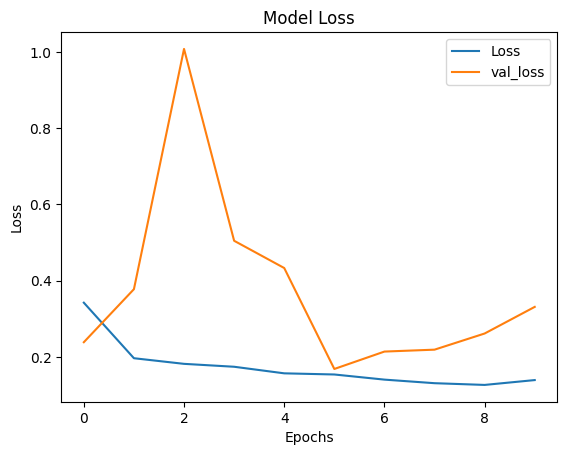

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','val_loss'])
plt.show()

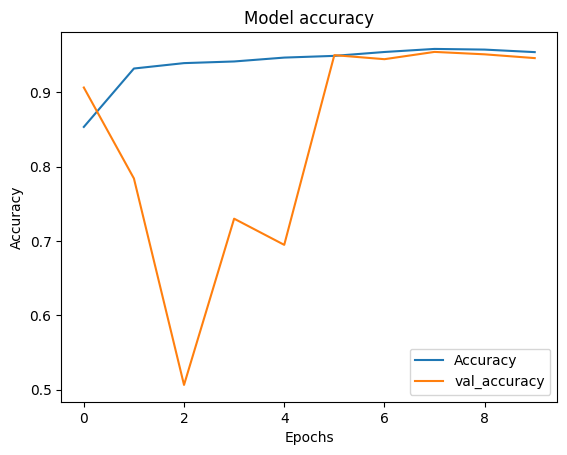

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','val_accuracy'])
plt.show()

In [21]:
test_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [22]:
test_dataset = test_dataset.batch(1)

In [24]:
lenet_model_func.evaluate(test_dataset)

2757/2757 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9471 - loss: 0.2387


[0.2322252243757248, 0.9419658780097961]

In [25]:
def parasite_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

In [27]:
parasite_or_not(lenet_model_func.predict(test_dataset.take(1))[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


'U'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


2024-04-13 18:07:58.210528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


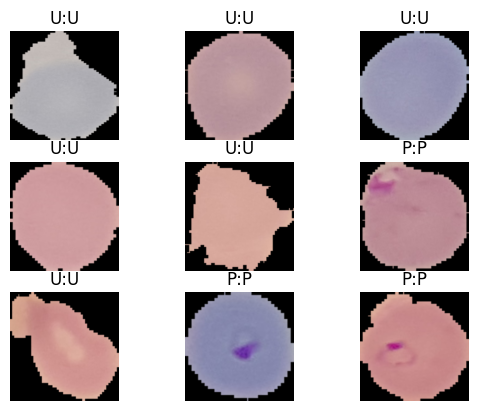

In [29]:
for i,(image,label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(lenet_model_func.predict(image)[0][0])))

  plt.axis('off')

In [31]:
lenet_model_func.save('lenet_save_model_func.keras')